# os

Use `os` to manipulate directory and files. You can list out files in directory, you can rename files, you can delete files... i.e. you can manipulate files in python instead of terminal commands (or precisely, bash).

https://docs.python.org/3/library/os.html

Use `os.path` to manipulate path names and file names.

https://docs.python.org/3/library/os.path.html

In [1]:
# Assume the folder hw3_data and this .ipynb are at the same directory.

import os
ls_fruit_file = os.listdir('hw3_data/fruit')
print(ls_fruit_file)

['apples.xlsx', 'apricots.xlsx', 'bananas.xlsx', 'berries_mixed.xlsx', 'blackberries.xlsx', 'blueberries.xlsx', 'cantaloupe.xlsx', 'cherries.xlsx', 'cranberries.xlsx', 'dates.xlsx', 'figs.xlsx', 'fruit_cocktail.xlsx', 'grapefruit.xlsx', 'grapes.xlsx', 'honeydew.xlsx', 'kiwi.xlsx', 'mangoes.xlsx', 'nectarines.xlsx', 'oranges.xlsx', 'papaya.xlsx', 'peaches.xlsx', 'pears.xlsx', 'pineapple.xlsx', 'plums.xlsx', 'pomegranate.xlsx', 'raspberries.xlsx', 'strawberries.xlsx', 'tangerines.xlsx', 'watermelon.xlsx', '~$oranges.xlsx']


In [2]:
import os.path
os.path.splitext('apples.xlsx')

('apples', '.xlsx')

In [3]:
os.path.split('hw3_data/fruit/apples.xlsx')

('hw3_data/fruit', 'apples.xlsx')

In [4]:
os.path.dirname('hw3_data/fruit/apples.xlsx')

'hw3_data/fruit'

In [5]:
os.path.basename('hw3_data/fruit/apples.xlsx')

'apples.xlsx'

In [6]:
os.path.join('hw3_data/fruit', 'apples.xlsx')

'hw3_data/fruit/apples.xlsx'


# Pandas!

http://pandas.pydata.org/pandas-docs/stable/10min.html

Use `pandas` to read the `.xlsx` files.

Tons of methods may be useful...

http://pandas.pydata.org/pandas-docs/stable/

https://pandas.pydata.org/pandas-docs/stable/api.html#string-handling

http://pandas.pydata.org/pandas-docs/stable/indexing.html

https://pandas.pydata.org/pandas-docs/stable/merging.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

In [9]:
import pandas as pd

apples_xlsx = pd.read_excel('hw3_data/fruit/apples.xlsx', header = None)
kiwi_xlsx = pd.read_excel('hw3_data/fruit/pineapple.xlsx', header = None)
cauliflower_xlsx = pd.read_excel('hw3_data/vegetables/cauliflower.xlsx', header = None)

In [10]:
apples_xlsx.head()

,0,1,2,3,4,5,6
0,Apples—Average retail price per pound or pint ...,NaN,NaN,NaN,NaN,NaN,NaN
1,Form,Average retail price,NaN,Preparation,Size of a,NaN,Average price
2,NaN,NaN,NaN,yield factor,cup equivalent,NaN,per cup equivalent
3,Fresh1,1.56752,per pound,0.9,0.242508,pounds,0.422373
4,Applesauce2,1.07782,per pound,1,0.540133,pounds,0.582168


In [11]:
apples_xlsx[3:4]

,0,1,2,3,4,5,6
3,Fresh1,1.56752,per pound,0.9,0.242508,pounds,0.422373


In [13]:
pd.concat([apples_xlsx[3:4], kiwi_xlsx[3:4]], ignore_index=True)

,0,1,2,3,4,5,6,7,8
0,Fresh1,1.56752,per pound,0.9,0.242508,pounds,0.422373,NaN,NaN
1,Fresh1,0.627662,per pound,0.51,0.363763,pounds,0.447686,NaN,NaN



# Pandas + Matplotlib

https://pandas.pydata.org/pandas-docs/stable/visualization.html



# FFT in Po's way 

You may notice that doing FFT in hw2's way results in weird image.

Here is the Po's way. You can see the image smoothly transformed from blurred to clear.

You can see the math is more complicated, but it worths it! We love cats! We should treat cats with better math.


In [250]:
# Assume cat.png is in current directory

from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")

In [251]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

In [252]:
import numpy as np

cat = np.array(cat_img)

In [256]:
def cut_high_frequency(img, fre_max):
    '''cut out higher frequncy of image
    
    Get a burr image by keepping Fourier coefficent of input image
    only up to frequency fre_max.
    
    A quick and dirty implementation. For illustration only.
    
    parameters:
        img (2d numpy array):
            the image as a matrix
        fre_max (int):
            the highest frequency to keep
    
    return:
        2d numpy array:
            the output image as matrix
    '''
    if fre_max > min(img.shape) or fre_max < 1:
        return img
    
    ind0 = img.shape[0] // 2
    ind1 = img.shape[1] // 2
    
    img_normalized = img - np.mean(img)
    img_coeff = np.fft.fftshift(np.fft.fft2(img_normalized))

    img_coeff_small = img_coeff[(ind0-fre_max//2):(ind0+1+fre_max//2), (ind1-fre_max//2):(ind1+1+fre_max//2)].copy()
    img_coeff[:,:] = 0
    img_coeff[(ind0-fre_max//2):(ind0+1+fre_max//2), (ind1-fre_max//2):(ind1+1+fre_max//2)] = img_coeff_small
    
    img_small = np.real(np.fft.ifft2(np.fft.ifftshift(img_coeff), img.shape)) + np.mean(img)
    
    return img_small

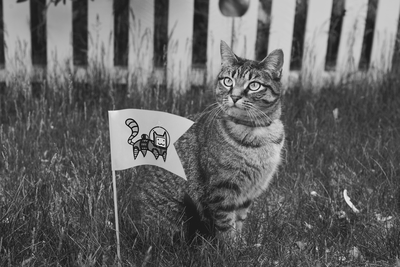

In [257]:
as_image(img)

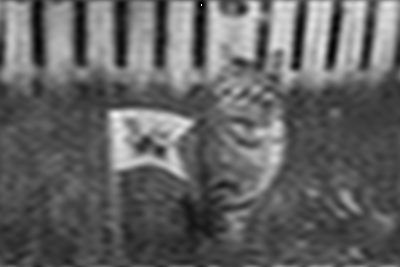

In [258]:

#Feel free to adjust the number from 1 to 200
#From a blurred image to clear image
as_image(cut_high_frequency(img, 50))